# Random Forest (Credit Card Fraud Prediction)

## Explanation

### Objective

create a machine learning model that can predict whether a credit card is a fraud or not, using the Random Forest algorithm.

### Column Descriptions

- ***transaction_id***      = Unique identifier for each transaction
- ***amount***              = Transaction amount
- ***transaction_hour***    = Hour of transaction (0–23)
- ***merchant_category***   = Type of merchant
- ***foreign_transaction*** = Indicates if transaction is international (0/1)
- ***location_mismatch***   = Billing vs transaction location mismatch (0/1)
- ***device_trust_score***  = Trust score of the device (0–100)
- ***velocity_last_24h***   = Number of transactions in last 24 hours
- ***cardholder_age***      = Age of the cardholder
- ***is_fraud***            = Target variable (0 = Normal, 1 = Fraud) 

## A. Data Preparation

### A.1 Import Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [56]:
try:
    df = pd.read_csv("credit_card_fraud_10k.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [57]:
df.shape

(10000, 10)

### A.4 Viewing Data Informations

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


### A.5 Viewing Data Statistics

In [59]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
amount,10000.00,175.95,175.39,0.00,50.91,122.09,242.48,1471.04
transaction_hour,10000.00,11.59,6.92,0.00,6.00,12.00,18.00,23.00
foreign_transaction,10000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
location_mismatch,10000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00
device_trust_score,10000.00,61.80,21.49,25.00,43.00,62.00,80.00,99.00
velocity_last_24h,10000.00,2.01,1.43,0.00,1.00,2.00,3.00,9.00
cardholder_age,10000.00,43.47,14.98,18.00,30.00,44.00,56.00,69.00
is_fraud,10000.00,0.02,0.12,0.00,0.00,0.00,0.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [60]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [61]:
df.tail()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0
9999,10000,44.06,2,Clothing,0,0,38,0,66,0


### A.7 Viewing Duplicated Data

In [62]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [63]:
df.isna().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

### A.9 Viewing Outlier Data

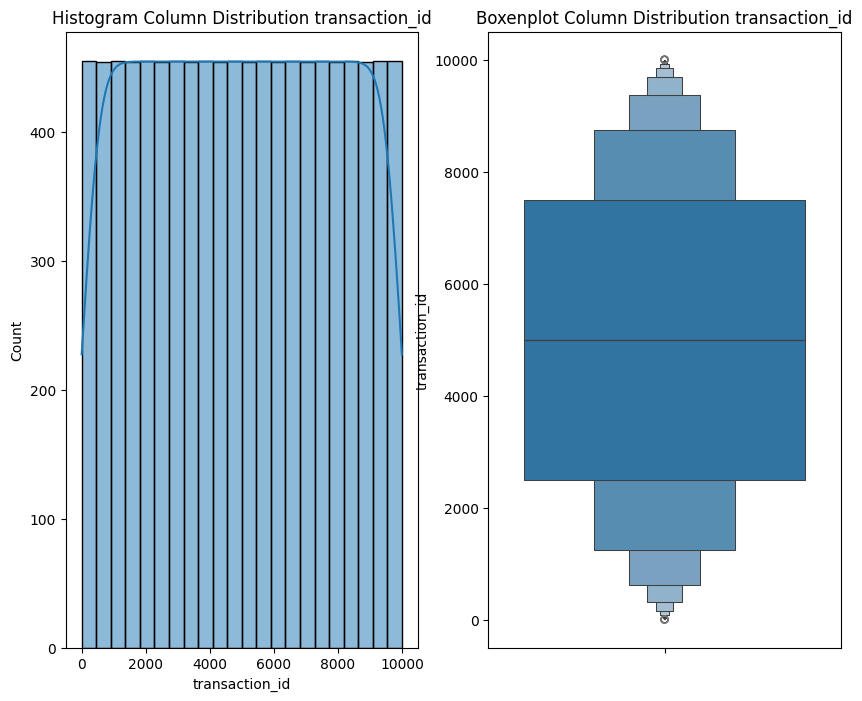

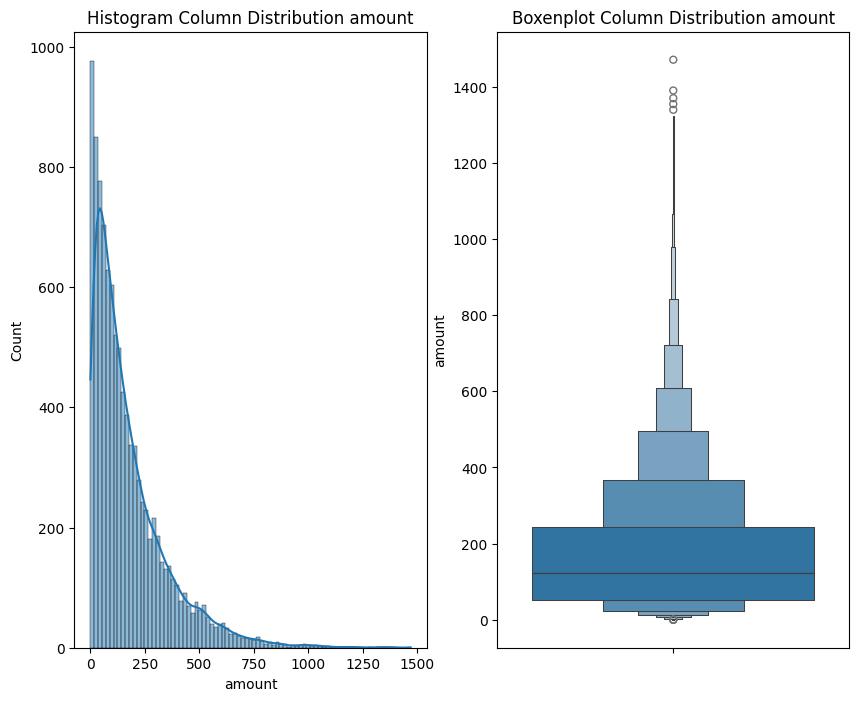

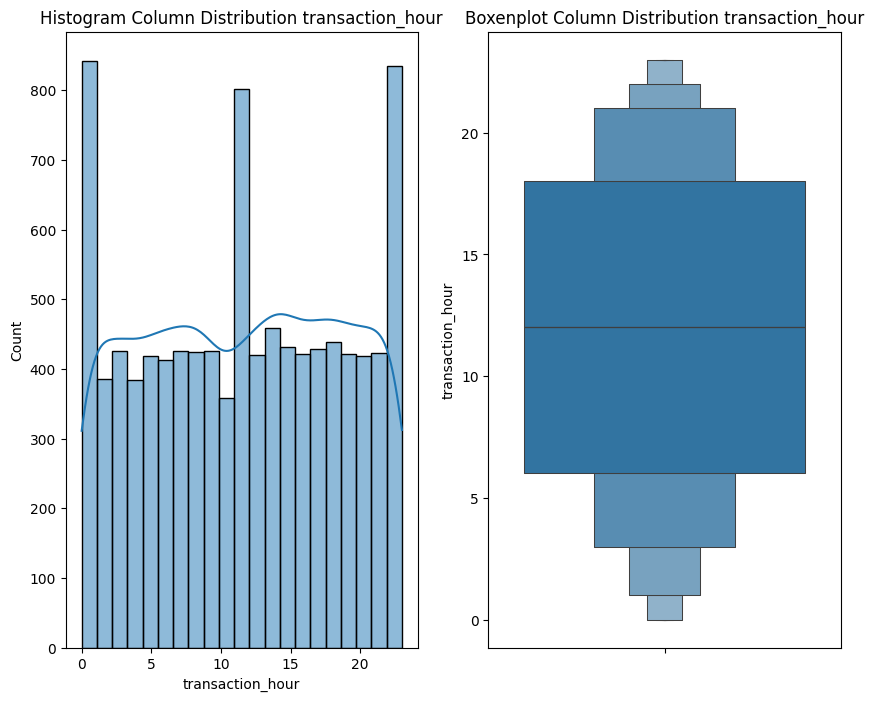

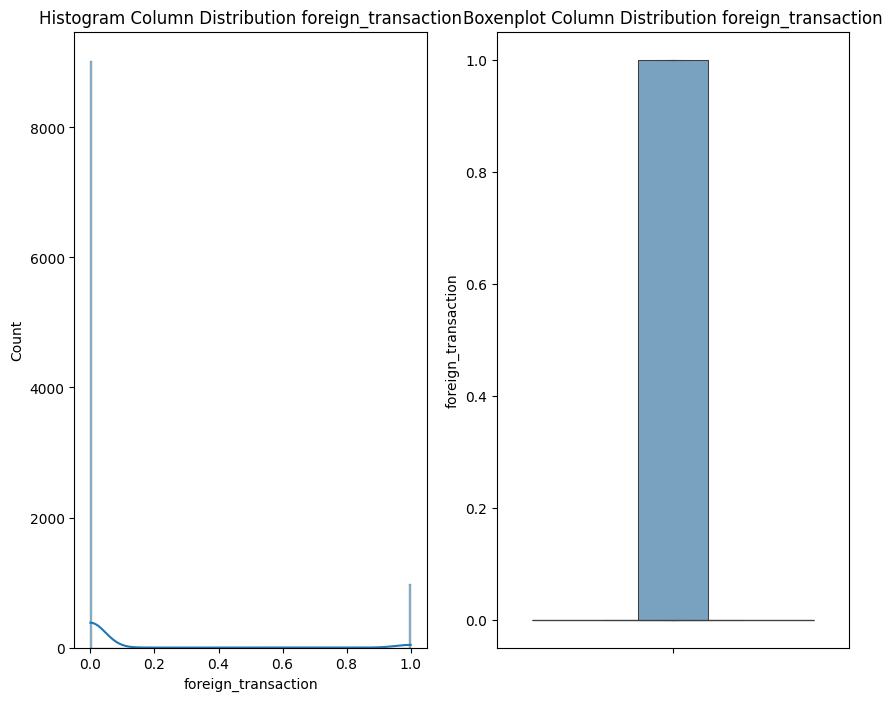

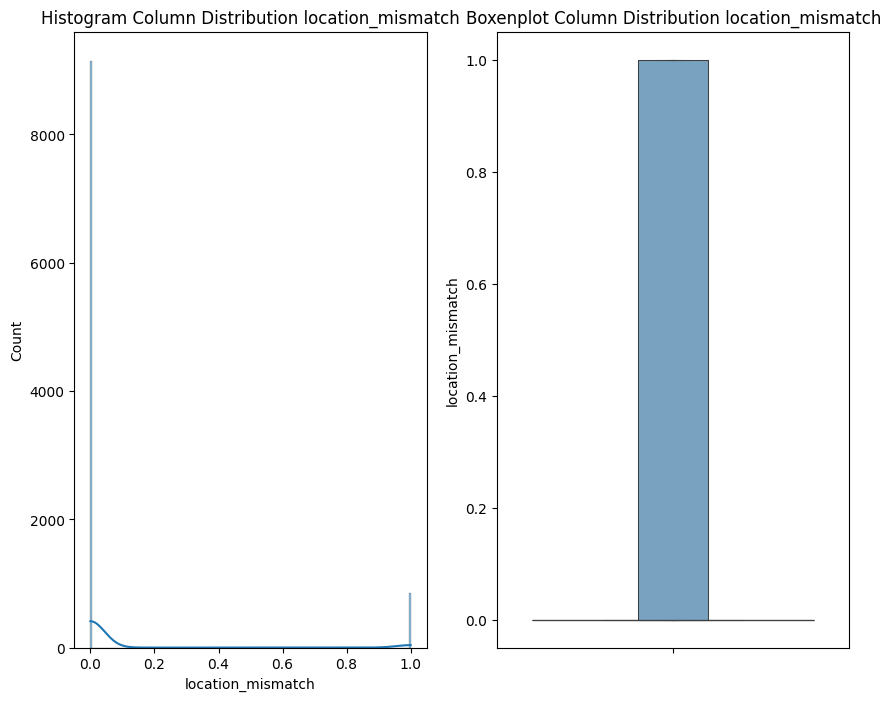

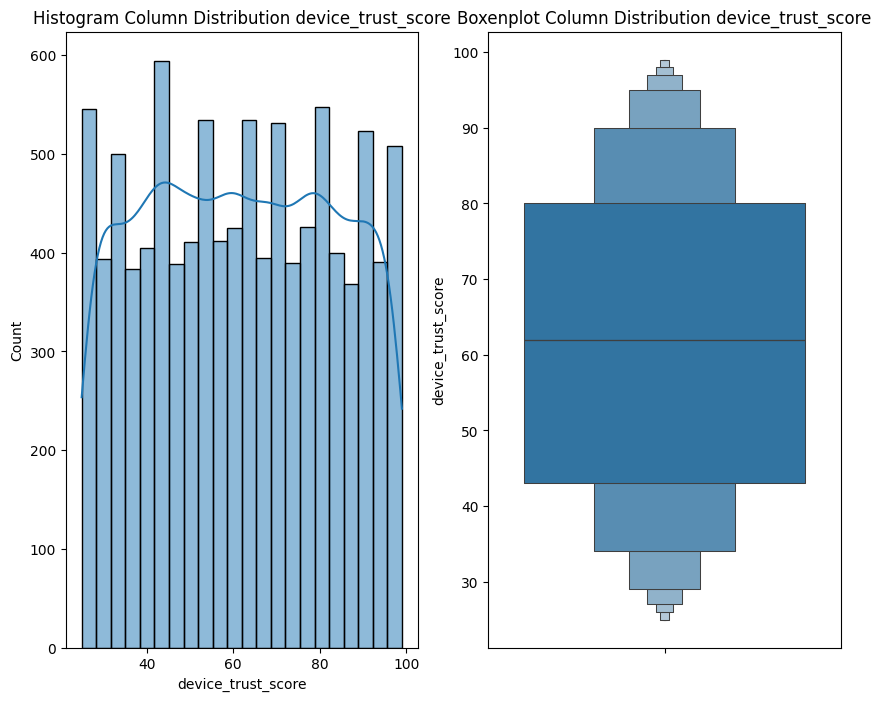

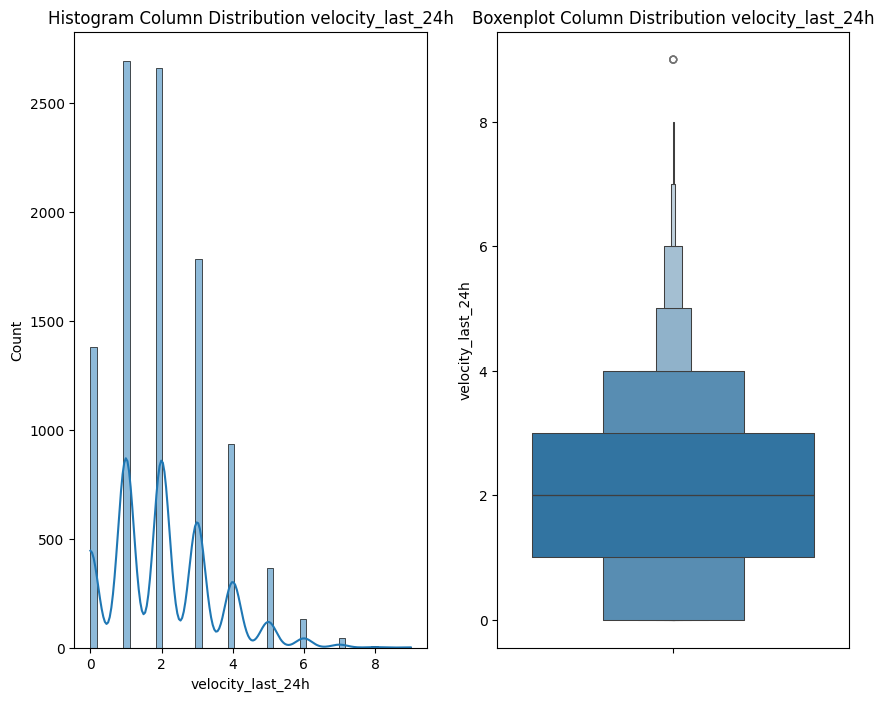

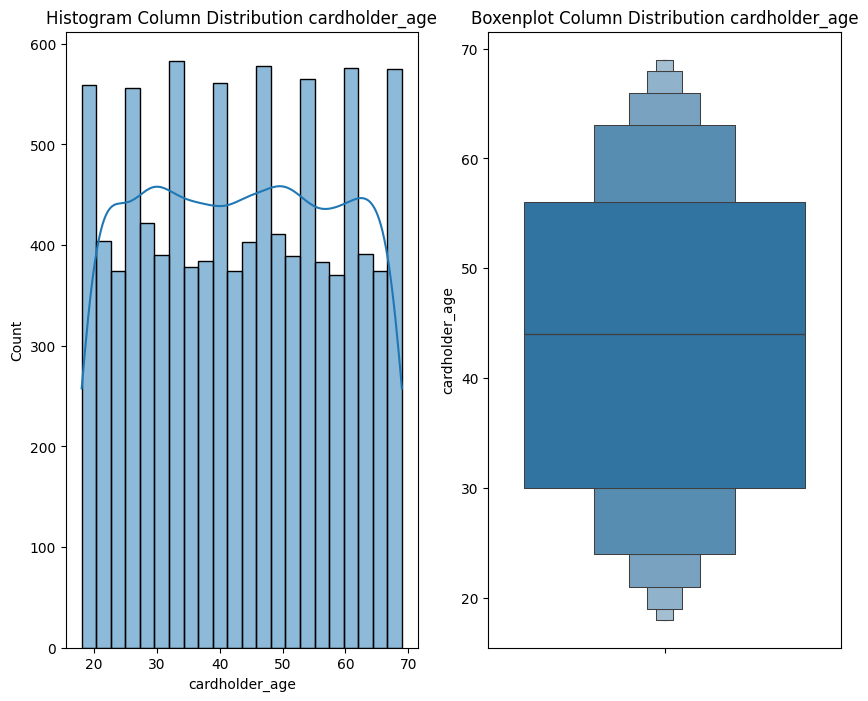

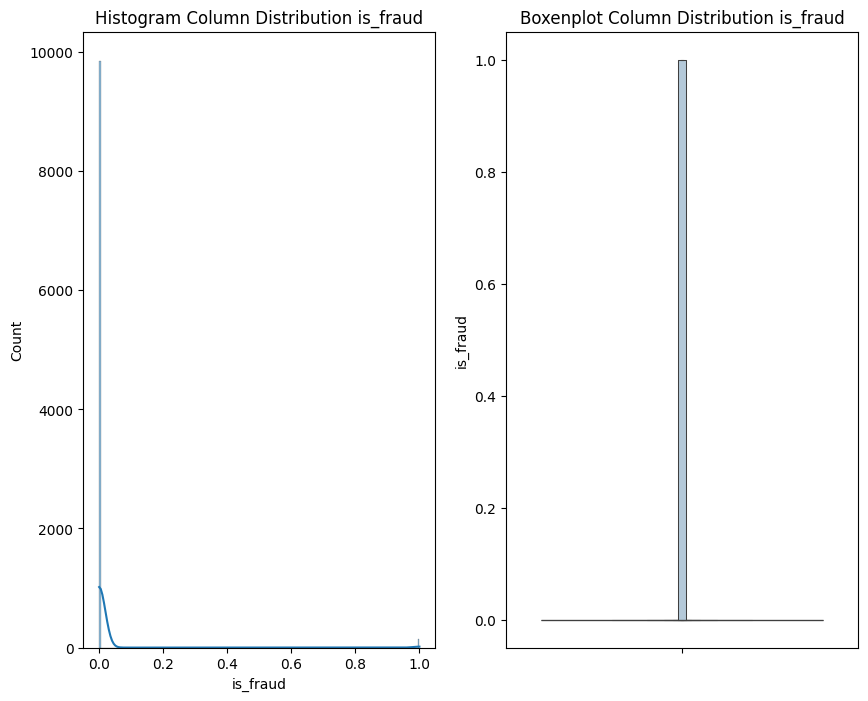

In [64]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxenplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxenplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [65]:
df_clean = df.drop(columns=['transaction_id'])

In [66]:
df_clean.columns

Index(['amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

### B.2 Mapping Feature

In [67]:
merchant_mapping = {'Electronics' : 0, 'Travel' : 1, 'Grocery' : 2, 'Food' : 3, 'Clothing' : 4}
df_clean['merchant_category_sign'] = df_clean['merchant_category'].map(merchant_mapping)

In [68]:
df_clean.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_sign
0,84.47,22,Electronics,0,0,66,3,40,0,0
1,541.82,3,Travel,1,0,87,1,64,0,1
2,237.01,17,Grocery,0,0,49,1,61,0,2
3,164.33,4,Grocery,0,1,72,3,34,0,2
4,30.53,15,Food,0,0,79,0,44,0,3


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Label Distributions

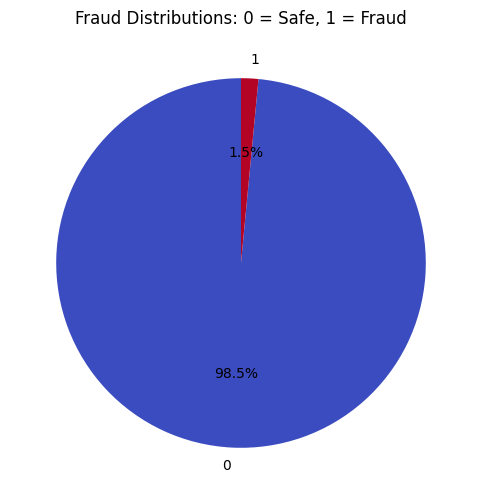

In [69]:
plt.figure(figsize=(6, 6))
df_clean['is_fraud'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Fraud Distributions: 0 = Safe, 1 = Fraud')
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

#### Cost Amount & Trust Score (Fraudsters VS Honest)

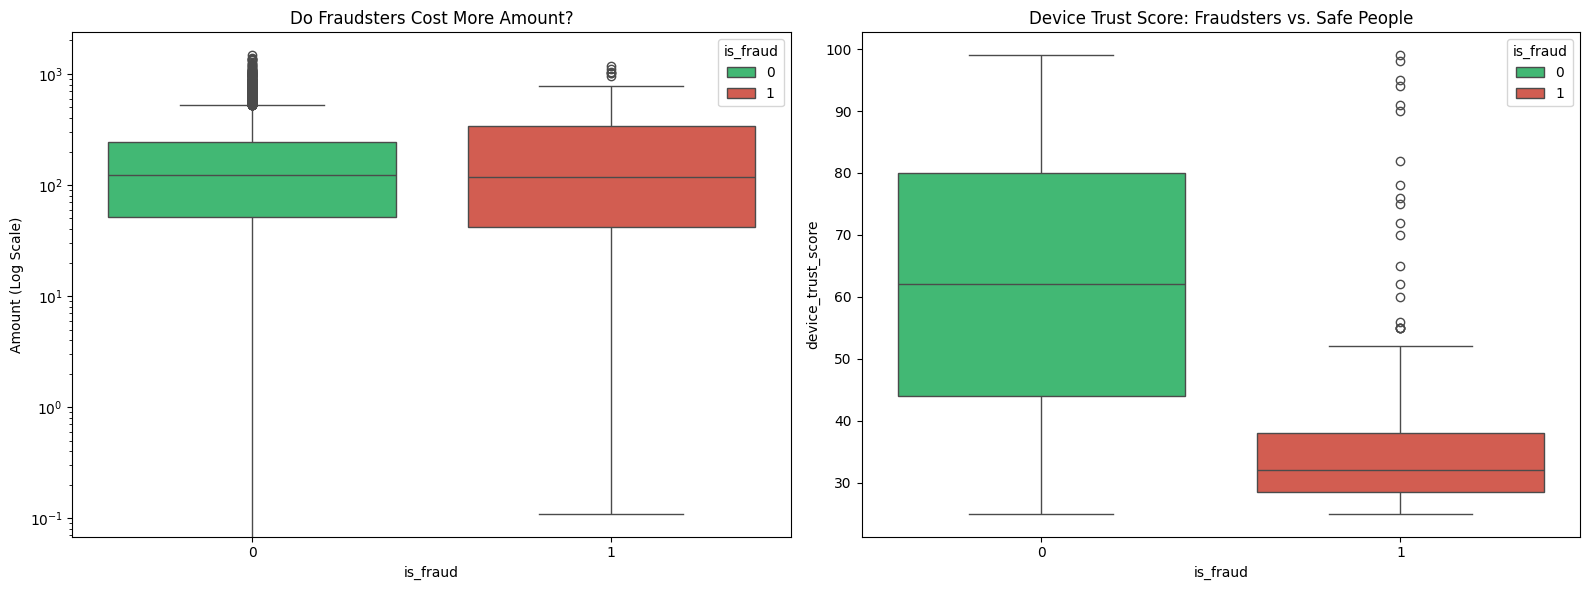

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: Amount vs Fraud
sns.boxplot(x='is_fraud', y='amount',  hue='is_fraud',data=df_clean, palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title("Do Fraudsters Cost More Amount?")
axes[0].set_yscale('log')
axes[0].set_ylabel("Amount (Log Scale)")

# Plot B: Trust Score vs Fraud
sns.boxplot(x='is_fraud', y='device_trust_score', hue='is_fraud',data=df_clean, palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title("Device Trust Score: Fraudsters vs. Safe People")

plt.tight_layout()
plt.show()

#### Transaction Hour & Merchant Category (Fraudsters VS Honest)

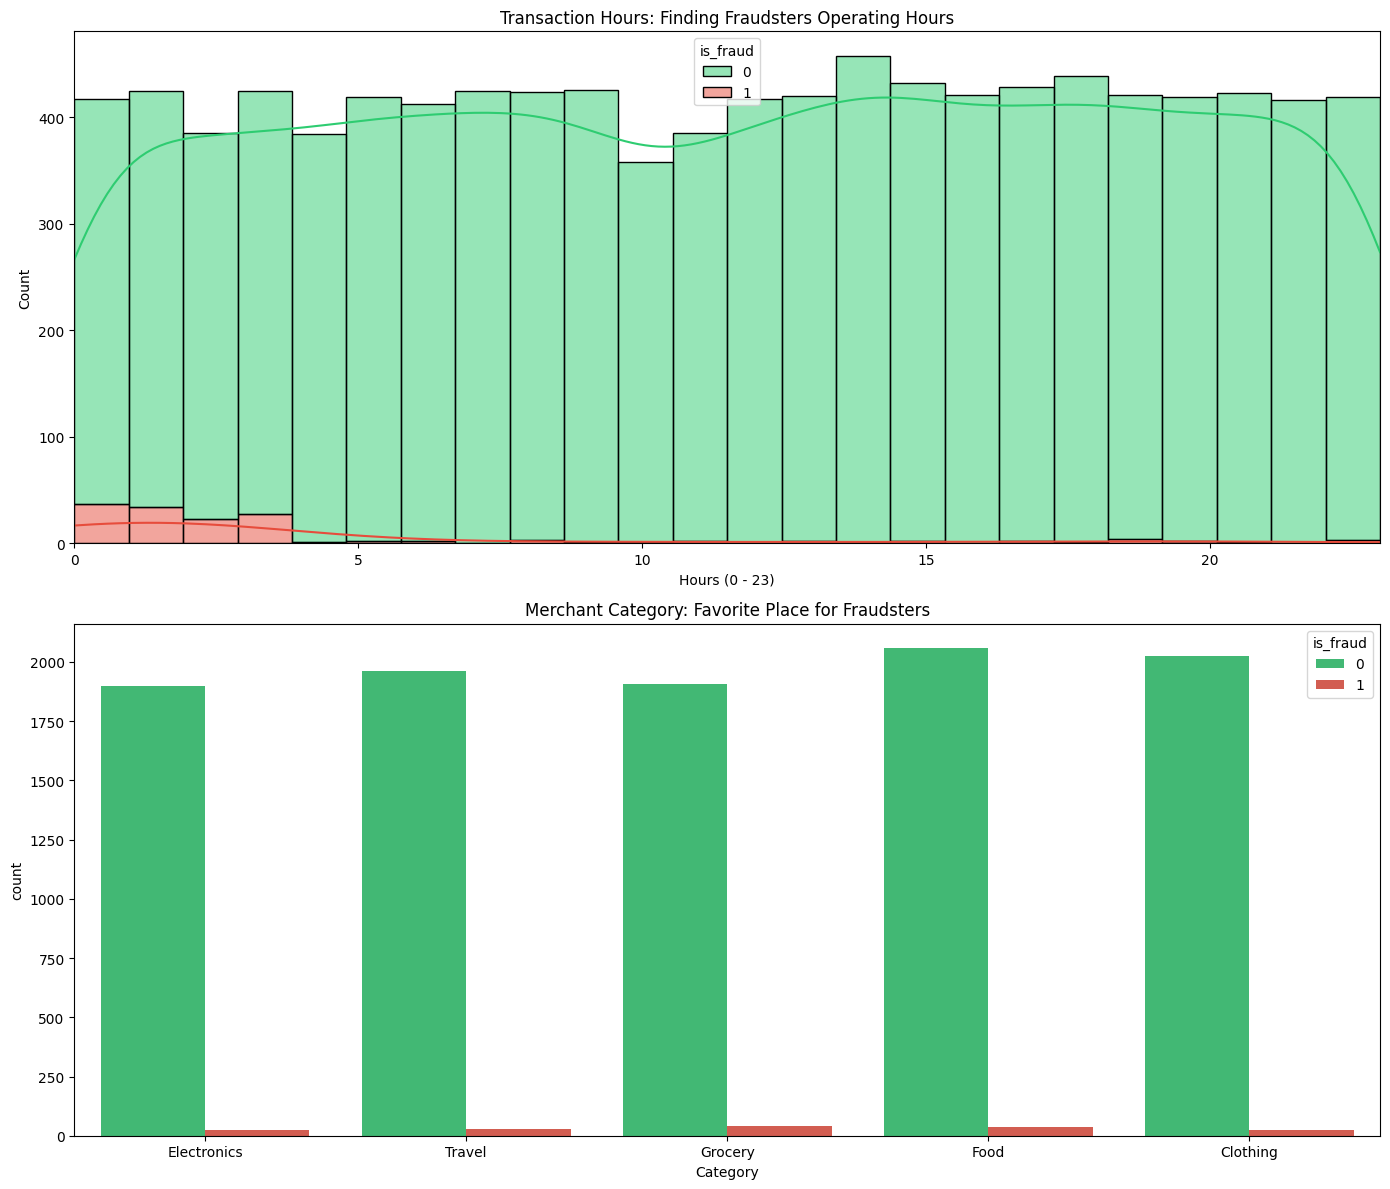

In [71]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot C: Transaction Hours (When do they operate?)
sns.histplot(data=df_clean, x='transaction_hour', hue='is_fraud', kde=True, 
             palette=['#2ecc71', '#e74c3c'], bins=24, ax=axes[0], multiple="stack")
axes[0].set_title("Transaction Hours: Finding Fraudsters Operating Hours")
axes[0].set_xlim(0, 23)
axes[0].set_xlabel("Hours (0 - 23)")

# Plot D: Store Category (Where do they shop?)
sns.countplot(data=df_clean, x='merchant_category', hue='is_fraud', palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title("Merchant Category: Favorite Place for Fraudsters")
axes[1].set_xlabel("Category")

plt.tight_layout()
plt.show()

#### Location & Foreign Transaction (Fraudsters VS Honest)  

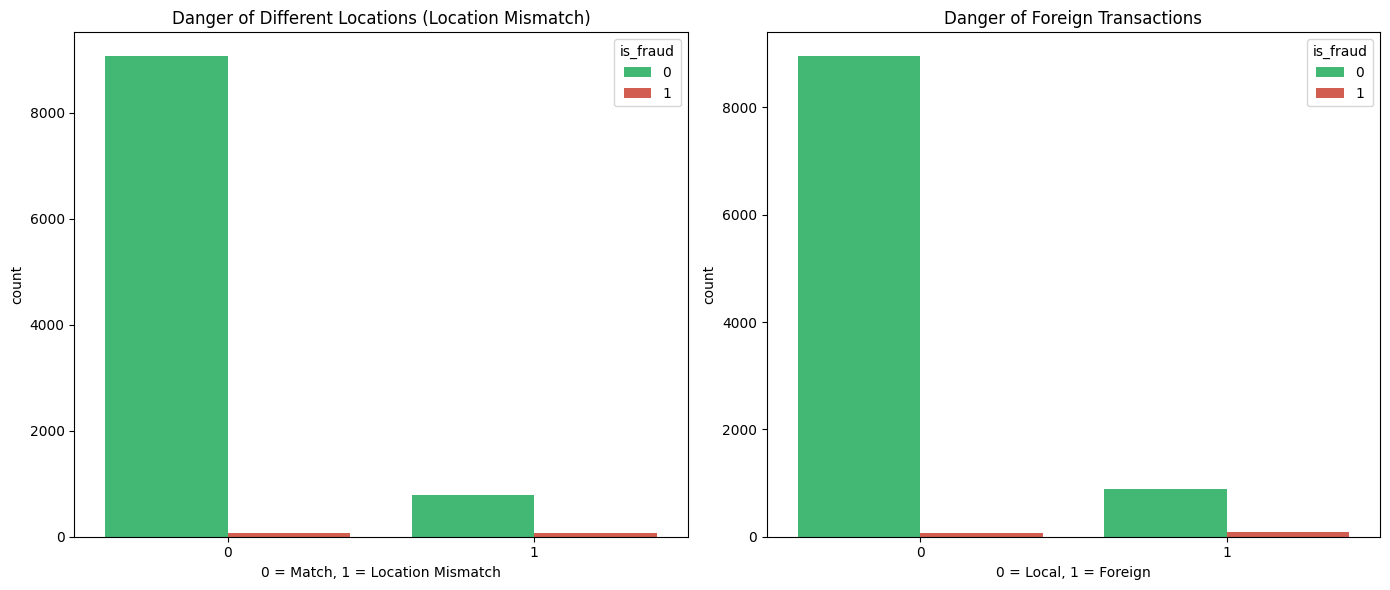

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Location Mismatch vs Fraud
sns.countplot(x='location_mismatch', hue='is_fraud', data=df_clean, palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Danger of Different Locations (Location Mismatch)')
axes[0].set_xlabel('0 = Match, 1 = Location Mismatch')

# 2. Foreign Transaction vs Fraud
sns.countplot(x='foreign_transaction', hue='is_fraud', data=df_clean, palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Danger of Foreign Transactions')
axes[1].set_xlabel('0 = Local, 1 = Foreign')

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

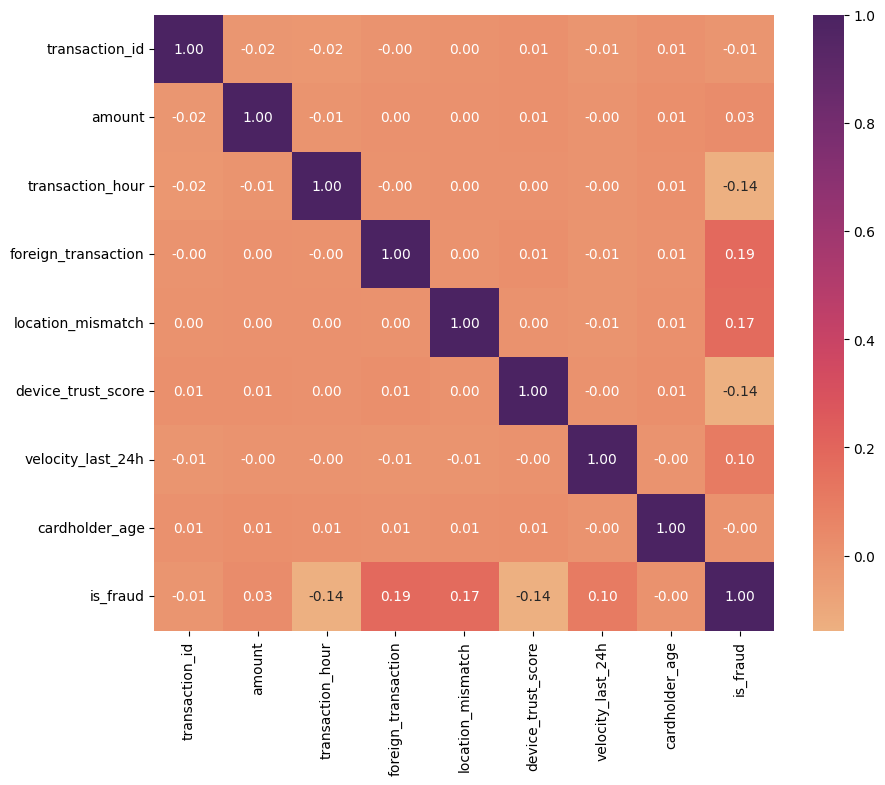

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [74]:
X_data = df.select_dtypes(include='number').drop(columns=['is_fraud', 'transaction_id'])
y_data = df['is_fraud']

### D.2 Splitting Train Data and Test Data (80:20)

In [75]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Decision Tree

In [76]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None, prob=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.prob = prob

class DecisionTreeID3:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping Criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            # Hitung Probabilitas (Jumlah Class 1 / Total Data di Node ini)
            prob = np.mean(y == 1) if len(y) > 0 else 0
            return Node(value=leaf_value, prob=prob)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, feat_idxs)
        
        if best_feat is None: # Kalau ga bisa split lagi
            leaf_value = self._most_common_label(y)
            prob = np.mean(y == 1)
            return Node(value=leaf_value, prob=prob)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = thr
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0: return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        return parent_entropy - child_entropy

    def _split(self, X_column, split_thresh):
        # Karena data PlayTennis kategorikal (0,1,2), kita pakai equality biasannya
        # Tapi biar umum, kita pakai <= (works for logic 0, 1 too)
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0: return 0
        return np.bincount(y).argmax()

    def predict_proba(self, X):
        X = np.array(X)
        return np.array([self._traverse_tree_prob(x, self.root) for x in X])

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.1).astype(int)

    def _traverse_tree_prob(self, x, node):
        if node.value is not None: return node.prob
        if x[node.feature] <= node.threshold:
            return self._traverse_tree_prob(x, node.left)
        return self._traverse_tree_prob(x, node.right)

### D.4 Random Forest

In [77]:
class RandomForestManual:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            # 1. Create New Tree
            tree = DecisionTreeID3(max_depth=self.max_depth, 
                                   min_samples_split=self.min_samples_split)
            
            # 2. Bootstrap Sampling (Randomize Data)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            
            # 3. Train the Tree
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        # Random choice with replacement (can pick the same data multiple times)
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        # COUNTER REPLACEMENT: Use np.bincount
        # This counts how many times 0 appears, 1 appears, etc.
        if len(y) == 0: return 0
        
        # Ensure data type is integer
        y = y.astype(int)
        counts = np.bincount(y)
        
        # Get the index with the highest count (Argmax)
        return np.argmax(counts)

    def predict(self, X):
        # Ask all trees to predict
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        
        # Swap axis to be per-sample: [n_samples, n_trees]
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        
        # Majority Voting using numpy
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

    def predict_proba(self, X):
        # Average probability from all trees
        tree_probs = np.array([tree.predict_proba(X) for tree in self.trees])
        # Column average
        avg_probs = np.mean(tree_probs, axis=0)
        return avg_probs

### D.5 Validation Curve (Finding Best Gap)

Starting Validation Curve Tuning...
Training with 1 trees...
Training with 3 trees...
Training with 5 trees...
Training with 10 trees...
Training with 15 trees...
Training with 20 trees...


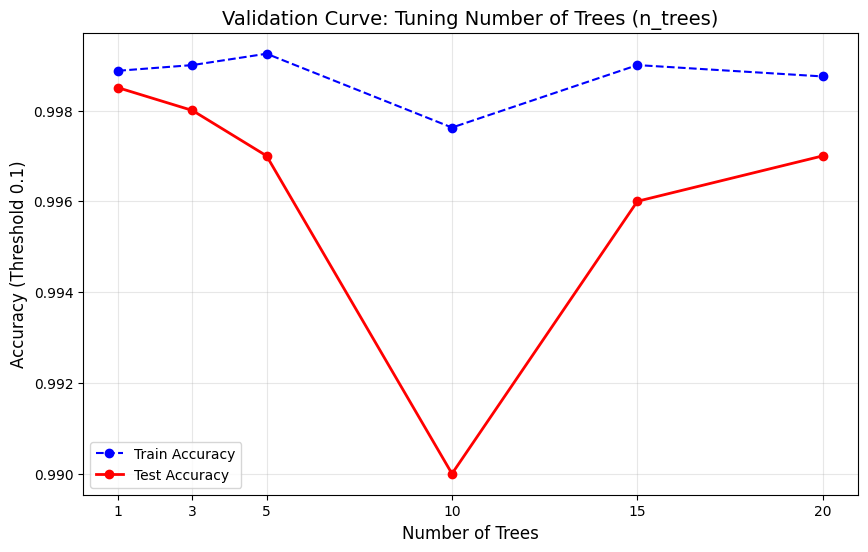

Best Test Accuracy found at n_trees: 1


In [78]:
# --- 1. Validation Curve Logic ---
train_accuracies = []
test_accuracies = []

n_trees_values = [1, 3, 5, 10, 15, 20]

print("Starting Validation Curve Tuning...")

for n in n_trees_values:
    print(f"Training with {n} trees...")
    model = RandomForestManual(n_trees=n, max_depth=10) 
    model.fit(X_train.values, y_train.values)
    
    # Train Accuracy (Using paranoid threshold 0.1)
    train_probs = model.predict_proba(X_train.values)
    train_pred = (train_probs >= 0.1).astype(int)
    train_acc = np.mean(train_pred == y_train.values)
    train_accuracies.append(train_acc)
    
    # Test Accuracy (Using paranoid threshold 0.1)
    test_probs = model.predict_proba(X_test.values)
    test_pred = (test_probs >= 0.1).astype(int)
    test_acc = np.mean(test_pred == y_test.values)
    test_accuracies.append(test_acc)

# --- 2. Visualization ---
plt.figure(figsize=(10, 6))

plt.plot(n_trees_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Accuracy')
plt.plot(n_trees_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Accuracy')

plt.title('Validation Curve: Tuning Number of Trees (n_trees)', fontsize=14)
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('Accuracy (Threshold 0.1)', fontsize=12)
plt.xticks(n_trees_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_n = n_trees_values[np.argmax(test_accuracies)]
print(f"Best Test Accuracy found at n_trees: {best_n}")

### D.6 Model Prediction (With Best N_Trees)

In [79]:
model = RandomForestManual(n_trees=3, max_depth=10) 
model.fit(X_train.values, y_train.values)
test_predictions = model.predict(X_test.values)
train_predictions = model.predict(X_train.values)

## E. Evaluation

### E.1 Model Accuracy

#### Test Accuracy

In [80]:
test_accuracy = np.mean(test_predictions == y_test.values)
print(f"Accuracy (Test): {test_accuracy:.3f}") 

Accuracy (Test): 0.999


#### Train Accuracy

In [81]:
train_accuracy = np.mean(train_predictions == y_train.values)
print(f"Accuracy (Train): {train_accuracy:.3f}") 

Accuracy (Train): 1.000


### E.2 Confusion Matrix

In [82]:
pred_array = np.array(test_predictions)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == 0))
FN = np.sum((pred_array == 0) & (test_array == 1))
TN = np.sum((pred_array == 0) & (test_array == 0))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 31
False Positives: 2
False Negatives: 0
True Negatives: 1968


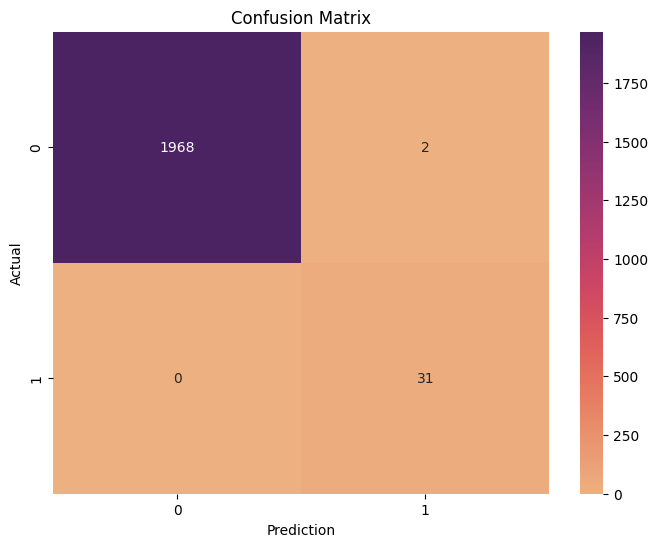

Class: Not Fraud
True Positives: 1968
False Positives: 0
False Negatives: 2
True Negatives: 31

Class: Fraud
True Positives: 31
False Positives: 2
False Negatives: 0
True Negatives: 1968



In [83]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Not Fraud"
    else:
        classes = "Fraud"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [84]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"Precision: {precision:.2f}")

Precision: 0.97


### E.4 Recall

In [85]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"Recall: {recall:.2f}")

Recall: 1.00


### E.5 F-1 Score

In [86]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F-1 Score: {f1:.2f}")

F-1 Score: 0.98


### E.6 ROC-AUC Visualization

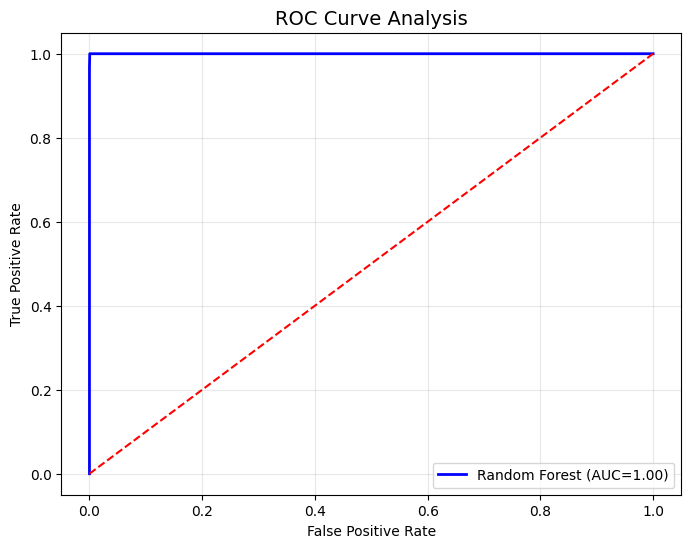

In [87]:
# --- 1. Get Probabilities Function ---
def get_probabilities(model, X_test):
    return model.predict_proba(X_test)

# --- 2. Main Logic: Calc ROC Curve ---
best_model = RandomForestManual(n_trees=3, max_depth=10)
best_model.fit(X_train.values, y_train.values)

y_probs = get_probabilities(best_model, X_test.values)

# Setup Thresholds 0% to 100%
thresholds = np.linspace(0, 1.1, 20) 
tpr_list = []
fpr_list = []

P = np.sum(y_test == 1) # Total Yes
N = np.sum(y_test == 0) # Total No

for t in thresholds:
    # Predict based on threshold t
    y_pred_temp = (y_probs >= t).astype(int)
    
    # Calculate TP (Yes detected as Yes)
    TP = np.sum((y_pred_temp == 1) & (y_test == 1))
    # Calculate FP (No detected as Yes)
    FP = np.sum((y_pred_temp == 1) & (y_test == 0))
    
    # Safety check for division by zero
    tpr = TP / P if P > 0 else 0
    fpr = FP / N if N > 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Calculate AUC (Area) Manual
auc_score = np.trapezoid(tpr_list[::-1], fpr_list[::-1]) # Reversed for correct integration

# --- 3. Visualization ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='blue', linewidth=2, label=f'Random Forest (AUC={abs(auc_score):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve Analysis', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### E.7 Model Evaluation (Visual)

In [88]:
X_test.columns

Index(['amount', 'transaction_hour', 'foreign_transaction',
       'location_mismatch', 'device_trust_score', 'velocity_last_24h',
       'cardholder_age'],
      dtype='object')

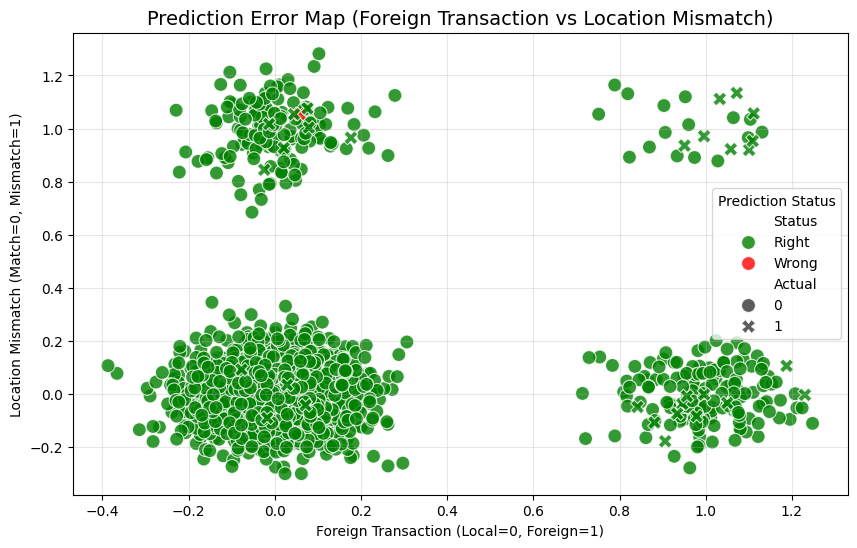

In [89]:
best_predictions = best_model.predict(X_test.values)

# --- 1. Prepare Plot Data ---
# We add "Jitter" (random noise) because data is categorical (0, 1, 2)
# so points don't overlap completely
jitter_x = np.random.normal(0, 0.1, size=len(X_test.values))
jitter_y = np.random.normal(0, 0.1, size=len(X_test.values))

plot_data = pd.DataFrame({
    'Foreign Transaction': X_test.iloc[:, 2] + jitter_x,  # Index 2 = Foreign Transaction
    'Location Mismatch': X_test.iloc[:, 3] + jitter_y, # Index 2 = Location Mismatch
    'Actual': y_test,
    'Prediction': best_predictions
})

# Define Status
plot_data['Status'] = np.where(plot_data['Actual'] == plot_data['Prediction'], 'Right', 'Wrong')

# --- 2. Visualization ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data, 
    x='Foreign Transaction', 
    y='Location Mismatch', 
    hue='Status',
    style='Actual',
    palette={'Right': 'green', 'Wrong': 'red'},
    s=100,
    alpha=0.8
)

plt.title('Prediction Error Map (Foreign Transaction vs Location Mismatch)', fontsize=14)
plt.xlabel('Foreign Transaction (Local=0, Foreign=1)')
plt.ylabel('Location Mismatch (Match=0, Mismatch=1)')
plt.legend(title='Prediction Status')
plt.grid(True, alpha=0.3)
plt.show()

### E.8 Residuals VS Predictions

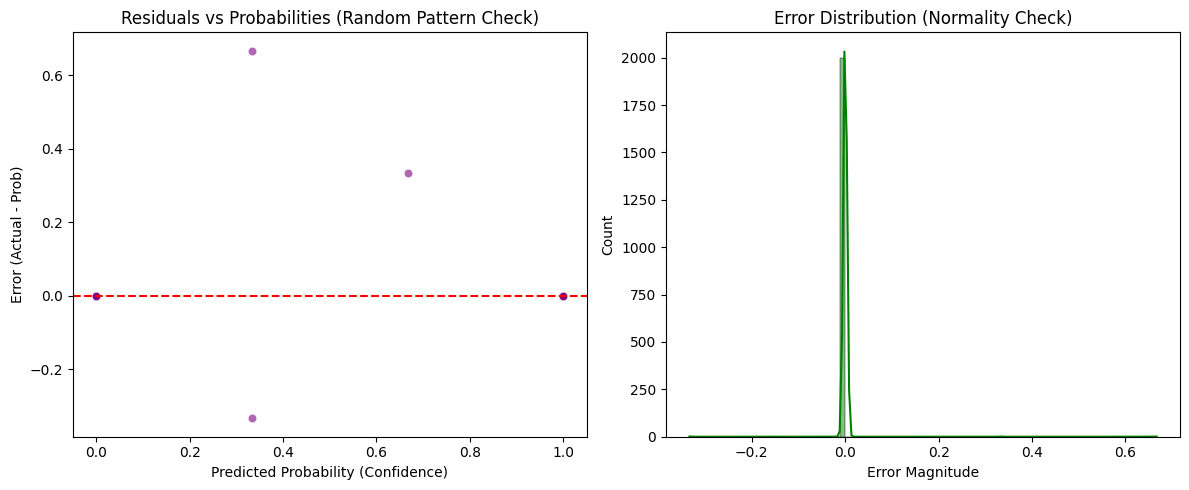

In [92]:
# --- 1. Prepare Data ---
# Use Probabilities (0.1 to 0.9) instead of Hard Classes (0 or 1) for better scatter plot
y_probs = best_model.predict_proba(X_test) 

# Calculate Residual (Actual - Probability)
# Example: Actual 1 - Prob 0.8 = Error 0.2
residuals = y_test - y_probs

# Flatten arrays to ensure 1D shape
preds_flat = y_probs.flatten()

# --- 2. Visualization ---
plt.figure(figsize=(12, 5))

# Plot 1: Residual Scatter
plt.subplot(1, 2, 1)
sns.scatterplot(x=preds_flat, y=residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Probabilities (Random Pattern Check)")
plt.xlabel("Predicted Probability (Confidence)")
plt.ylabel("Error (Actual - Prob)")

# Plot 2: Residual Histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='green')
plt.title("Error Distribution (Normality Check)")
plt.xlabel("Error Magnitude")

plt.tight_layout()
plt.show()